# Housing Price Prediction

## Importing required libraries 

In [201]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

### Data Collection

In [38]:
train_df = pd.read_csv("Data/train.csv")
test_df = pd.read_csv("Data/test.csv")

### Data Cleaning and Preprocessing

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.dtypes[train_df.dtypes != object]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

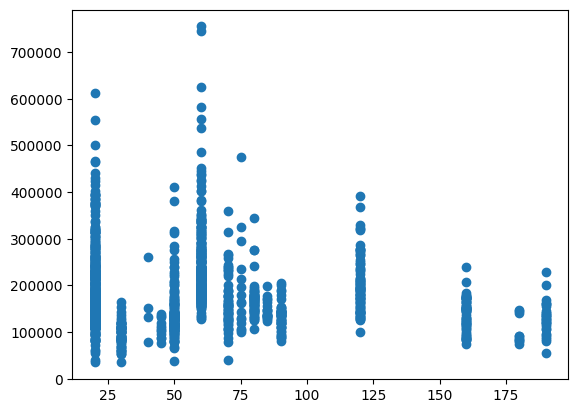

In [25]:
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

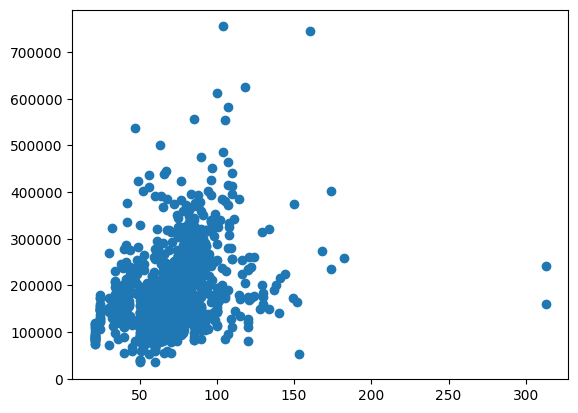

In [26]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [ ]:
train_df.query('LotFrontage > 300')
# 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


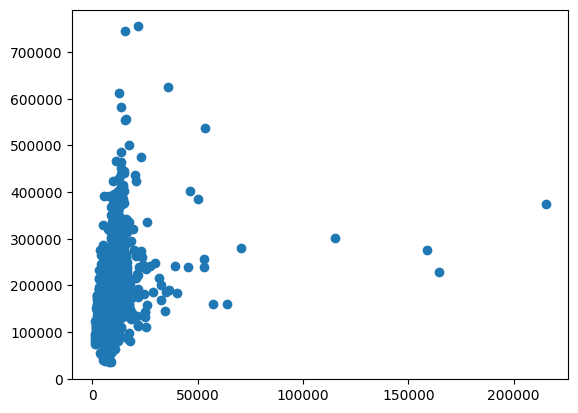

In [30]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('LotArea > 100000')
#250, 314, 336, 707, 935, 1299


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


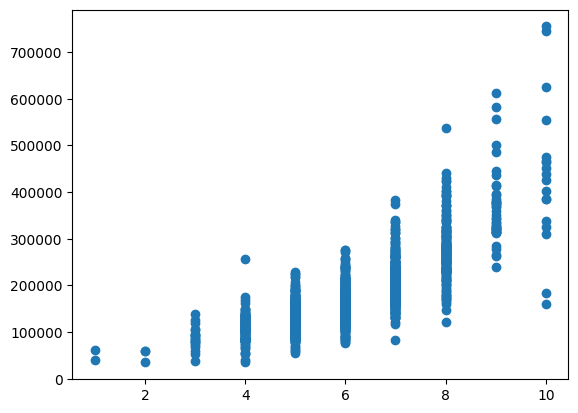

In [32]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [ ]:
train_df.query('OverallQual == 10 & SalePrice > 700000')
#692, 183


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


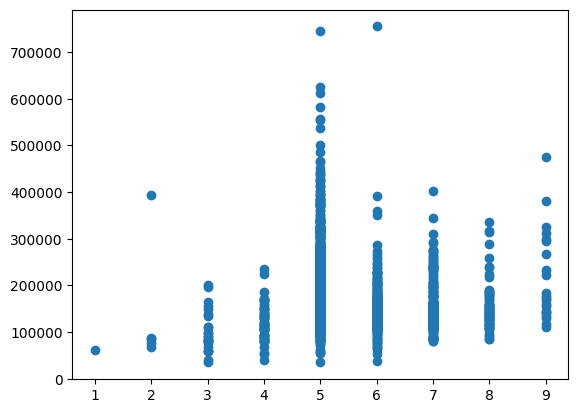

In [34]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [ ]:
train_df.query('(OverallCond == 2 & SalePrice > 200000) or (OverallCond == 6 & SalePrice > 700000)')
#379, 692


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


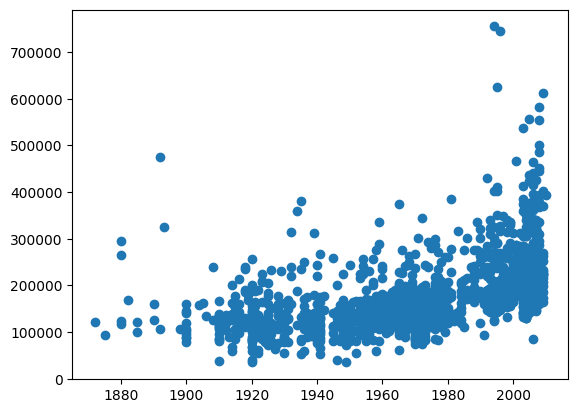

In [38]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [ ]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


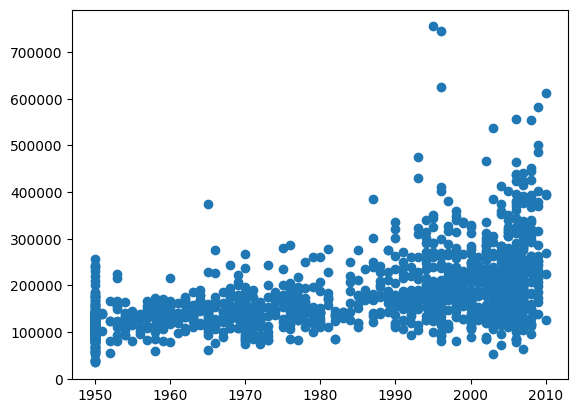

In [40]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [ ]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#314


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


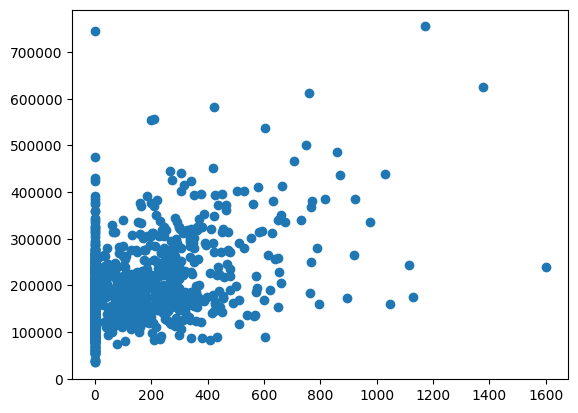

In [54]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [57]:
z_scores = stats.zscore(train_df['MasVnrArea'].dropna())


In [58]:
z_scores = pd.Series(z_scores, index=train_df['MasVnrArea'].dropna().index)


In [ ]:
z_scores.sort_values().tail(10)
#298, 1170, 692, 116, 71, 809, 59 

517     4.515455
224     4.520980
981     4.813791
58      5.123177
808     5.211573
70      5.587256
115     5.664602
691     5.891116
1169    7.040263
297     8.266757
Name: MasVnrArea, dtype: float64

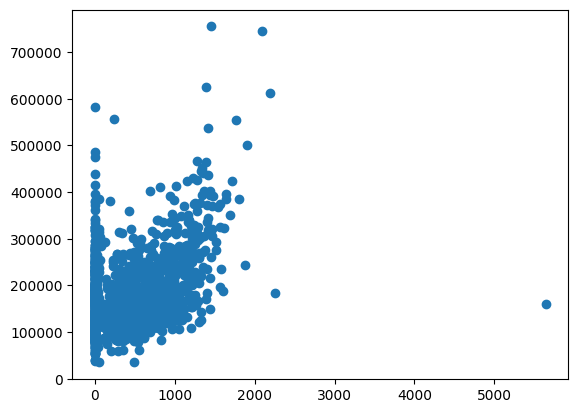

In [62]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [ ]:
stats.zscore(train_df['BsmtFinSF1']).sort_values().tail(10)
#1299

654      2.746754
664      2.801586
440      2.902476
53       2.996786
70       3.150315
178      3.202953
1182     3.624059
898      3.825839
523      3.983754
1298    11.405753
Name: BsmtFinSF1, dtype: float64

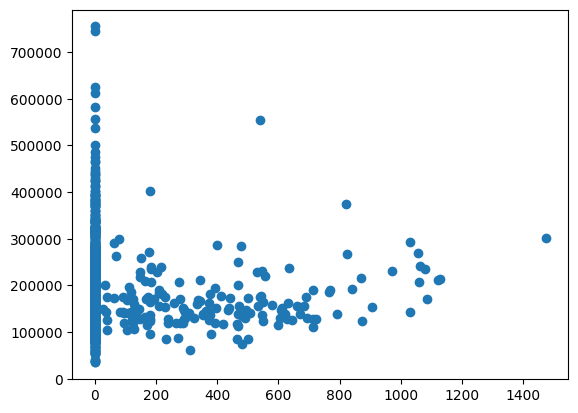

In [65]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [ ]:
stats.zscore(train_df['BsmtFinSF2']).sort_values().tail(10)
#441, 323


1458    6.092188
1253    6.104590
764     6.265816
924     6.290620
271     6.303022
153     6.408439
854     6.439444
470     6.656480
542     6.699887
322     8.851638
Name: BsmtFinSF2, dtype: float64

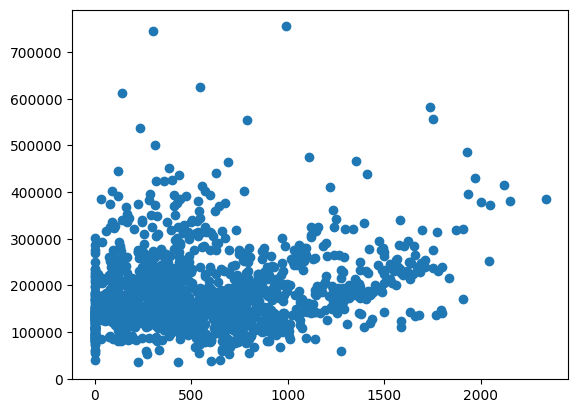

In [76]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

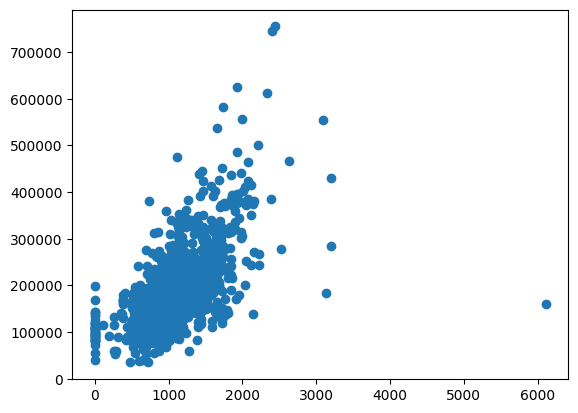

In [ ]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [ ]:
stats.zscore(train_df['TotalBsmtSF']).sort_values().tail(10)
#1299


224      3.043108
1182     3.052229
691      3.161680
1044     3.344097
1373     3.592640
440      4.643820
523      4.744149
496      4.885522
332      4.899204
1298    11.520949
Name: TotalBsmtSF, dtype: float64

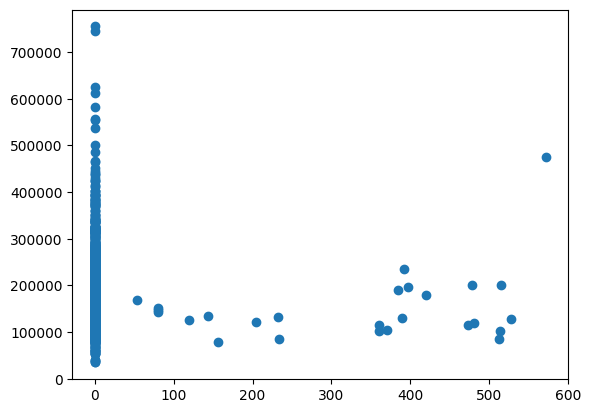

In [83]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)

In [ ]:
stats.zscore(train_df['LowQualFinSF']).sort_values().tail(10)
#186, 171, 636, 1010, 89


1031     8.047402
267      8.520591
406      9.610982
1173     9.734422
883      9.775569
88      10.433918
1009    10.454492
635     10.475065
170     10.742519
185     11.647749
Name: LowQualFinSF, dtype: float64

In [ ]:
stats.zscore(train_df['GrLivArea']).sort_values().tail(10)
#1299

769     3.357196
635     3.578022
1268    3.677013
304     3.764582
185     3.983504
1169    4.019674
691     5.331304
1182    5.635892
523     6.016627
1298    7.855574
Name: GrLivArea, dtype: float64

In [ ]:
stats.zscore(train_df['BsmtFullBath']).sort_values().tail(10)
#739


420     3.035585
335     3.035585
53      3.035585
188     3.035585
326     3.035585
588     3.035585
921     3.035585
634     3.035585
1163    3.035585
738     4.963359
Name: BsmtFullBath, dtype: float64

In [ ]:
stats.zscore(train_df['BsmtHalfBath']).sort_values().tail(10)
# 955, 598


245     3.948809
558     3.948809
1123    3.948809
1287    3.948809
426     3.948809
1006    3.948809
249     3.948809
358     3.948809
597     8.138680
954     8.138680
Name: BsmtHalfBath, dtype: float64

In [ ]:
stats.zscore(train_df['FullBath']).sort_values().tail(10)

798     2.605522
691     2.605522
523     2.605522
20      2.605522
1268    2.605522
304     2.605522
1182    2.605522
118     2.605522
496     2.605522
686     2.605522
Name: FullBath, dtype: float64

In [88]:
stats.zscore(train_df['HalfBath']).sort_values().tail(10)

1163    3.216791
1350    3.216791
597     3.216791
188     3.216791
624     3.216791
628     3.216791
921     3.216791
298     3.216791
1230    3.216791
1450    3.216791
Name: HalfBath, dtype: float64

In [ ]:
stats.zscore(train_df['BedroomAbvGr']).sort_values().tail(10)
# 636


883     2.616266
910     2.616266
843     3.842510
1350    3.842510
570     3.842510
144     3.842510
291     3.842510
897     3.842510
330     3.842510
635     6.294997
Name: BedroomAbvGr, dtype: float64

In [ ]:
stats.zscore(train_df['KitchenAbvGr']).sort_values().tail(10)
# 49, 810


39     4.328579
676    4.328579
342    4.328579
778    4.328579
921    4.328579
984    4.328579
505    4.328579
441    4.328579
48     8.868612
809    8.868612
Name: KitchenAbvGr, dtype: float64

In [ ]:
stats.zscore(train_df['TotRmsAbvGrd']).sort_values().tail(10)
# 636


185     3.373996
910     3.373996
1031    3.373996
1298    3.373996
803     3.373996
1230    3.373996
1386    3.373996
769     3.373996
897     3.373996
635     4.604889
Name: TotRmsAbvGrd, dtype: float64

In [93]:
stats.zscore(train_df['Fireplaces']).sort_values().tail(10)


898     2.152216
577     2.152216
313     2.152216
185     2.152216
1250    2.152216
642     3.703938
1298    3.703938
605     3.703938
309     3.703938
166     3.703938
Name: Fireplaces, dtype: float64

In [95]:
stats.zscore(train_df['GarageCars']).sort_values().tail(10)


231     1.650307
1243    1.650307
270     1.650307
1241    1.650307
272     1.650307
1340    2.988889
1190    2.988889
1350    2.988889
747     2.988889
420     2.988889
Name: GarageCars, dtype: float64

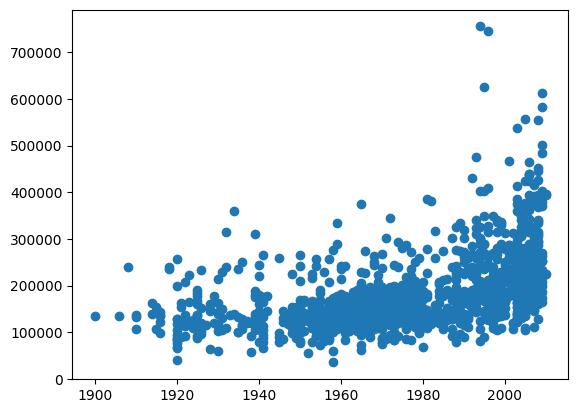

In [96]:
plt.scatter(x='GarageYrBlt', y ='SalePrice', data=train_df)

In [4]:
stats.zscore(train_df['GarageArea']).sort_values().tail(10)
# 1299, 582, 1191


NameError: name 'train_df' is not defined

In [ ]:
stats.zscore(train_df['WoodDeckSF']).sort_values().tail(10)
#54, 1460, 1069


961     3.637434
169     3.828981
64      3.844943
1423    3.924754
1210    4.315829
1313    4.579205
335     4.595168
1068    5.058072
1459    5.121921
53      6.087635
Name: WoodDeckSF, dtype: float64

In [ ]:
stats.zscore(train_df['OpenPorchSF']).sort_values().tail(10)
# 496, 1329, 584


807     4.006136
645     4.006136
996     4.111823
735     4.443982
875     4.791239
523     5.425361
854     5.606538
583     6.874782
495     7.191843
1328    7.554198
Name: OpenPorchSF, dtype: float64

In [ ]:
stats.zscore(train_df['EnclosedPorch']).sort_values().tail(10)
# 198, 745, 1198


1152    4.223460
1326    4.321663
496     4.403498
630     4.436233
358     4.452600
1360    4.567169
939     4.845410
1197    5.041815
747     5.958372
197     8.675309
Name: EnclosedPorch, dtype: float64

In [103]:
stats.zscore(train_df['3SsnPorch']).sort_values().tail(10)


280      6.571417
1161     7.253841
1080     7.253841
237      8.004507
258      8.243356
1346     9.778810
1437    10.256507
5       10.802446
55      13.770991
205     17.217233
Name: 3SsnPorch, dtype: float64

In [ ]:
stats.zscore(train_df['ScreenPorch']).sort_values().tail(10)
#1329, 1387, 186


1282    4.896794
72      4.950617
854     5.327377
907     5.506787
359     6.439718
625     6.637069
426     6.834420
185     7.085593
1386    7.623823
1328    8.341462
Name: ScreenPorch, dtype: float64

In [ ]:
stats.zscore(train_df['PoolArea']).sort_values().tail(10)
# 1424, 811, 1171, 1183, 1387, 198, 1299


479     -0.068692
478     -0.068692
485     -0.068692
1298    11.882444
197     12.679187
1386    12.853474
1182    13.749810
1170    14.272672
810     16.065342
1423    18.306180
Name: PoolArea, dtype: float64

In [3]:
values = [250, 314, 336, 707, 935, 1299, 692, 183, 379, 186, 292, 1170, 116, 71, 809, 59, 441, 323, 171, 636, 1010, 89, 739, 955, 598, 49, 810,  582, 1191, 54, 1460, 1069,  496, 1329, 584, 198, 745, 1198, 1387]

In [39]:
train_df = train_df[train_df.Id.isin(values) == False]

In [40]:
train_df.shape

(1421, 81)

In [49]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
FireplaceQu,679
LotFrontage,254
GarageType,73
GarageCond,73
GarageYrBlt,73
GarageFinish,73
GarageQual,73
BsmtFinType2,37
BsmtExposure,37
BsmtFinType1,36


In [41]:
drop = ['PoolQC','MiscFeature', 'Alley', 'Fence']

In [42]:
train_df = train_df.drop(columns=drop)

In [98]:
test_df = test_df.drop(columns=drop)

In [43]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

In [44]:
mapping = {'None' : 1,
           'BrkFace' : 2,
           'Stone' : 3,
           'BrkCmn' : 4}

In [45]:
train_df['MasVnrType'] = train_df['MasVnrType'].map(mapping)

In [46]:
train_df['MasVnrType'].value_counts()

MasVnrType
1    851
2    433
3    123
4     14
Name: count, dtype: int64

In [47]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

In [50]:
train_df['MasVnrArea'] = train_df['MasVnrType'] * train_df['MasVnrArea']

In [51]:
train_df['MasVnrArea'].value_counts()

MasVnrArea
0.0       848
216.0       9
360.0       7
720.0       7
240.0       7
         ... 
1008.0      1
756.0       1
1124.0      1
178.0       1
357.0       1
Name: count, Length: 345, dtype: int64

In [52]:
train_df = train_df.drop(columns='MasVnrType')

In [97]:
test_df = test_df.drop(columns='MasVnrType')

In [53]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
mapping = {'None' : 0,
           'Po' : 1,
           'Fa' : 2,
           'Ta' : 3,
           'Gd' : 4,
           'Ex': 5}
train_df['FireplaceQu'] = train_df['FireplaceQu'].map(mapping)

In [54]:
train_df['FireplaceQu'].value_counts()

FireplaceQu
0.0    679
4.0    365
2.0     32
5.0     21
1.0     20
Name: count, dtype: int64

In [55]:
train_df['Fireplaces'] = train_df['FireplaceQu'] * train_df['Fireplaces']

In [56]:
train_df = train_df.drop(columns='FireplaceQu')

In [ ]:
test_df = test_df.drop(columns='FirePlaceQu')

In [57]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0)

In [58]:
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

In [60]:
train_df['GarageCond'] = train_df['GarageCond'].fillna('None')
train_df['GarageType'] = train_df['GarageType'].fillna('None')
train_df['GarageFinish'] = train_df['GarageFinish'].fillna('None')
train_df['GarageQual'] = train_df['GarageQual'].fillna('None')

In [63]:
train_df['GarageType'].value_counts()

GarageType
Attchd     849
Detchd     379
BuiltIn     87
None        73
Basment     19
CarPort      9
2Types       5
Name: count, dtype: int64

In [64]:
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('None')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('None')
train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')
train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')

In [66]:
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('None')

In [67]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [68]:
pd.DataFrame(train_df.isna().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


### Feature Engineering

In [69]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [72]:
train_df.shape

(1421, 75)

In [77]:
train_df.dtypes[train_df.dtypes != object]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces       float64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [ ]:
train_df['Age'] = train_df['YrSold'] - train_df['YearBuilt']

In [80]:
test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']

In [81]:
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [87]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

In [88]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [89]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [90]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: >

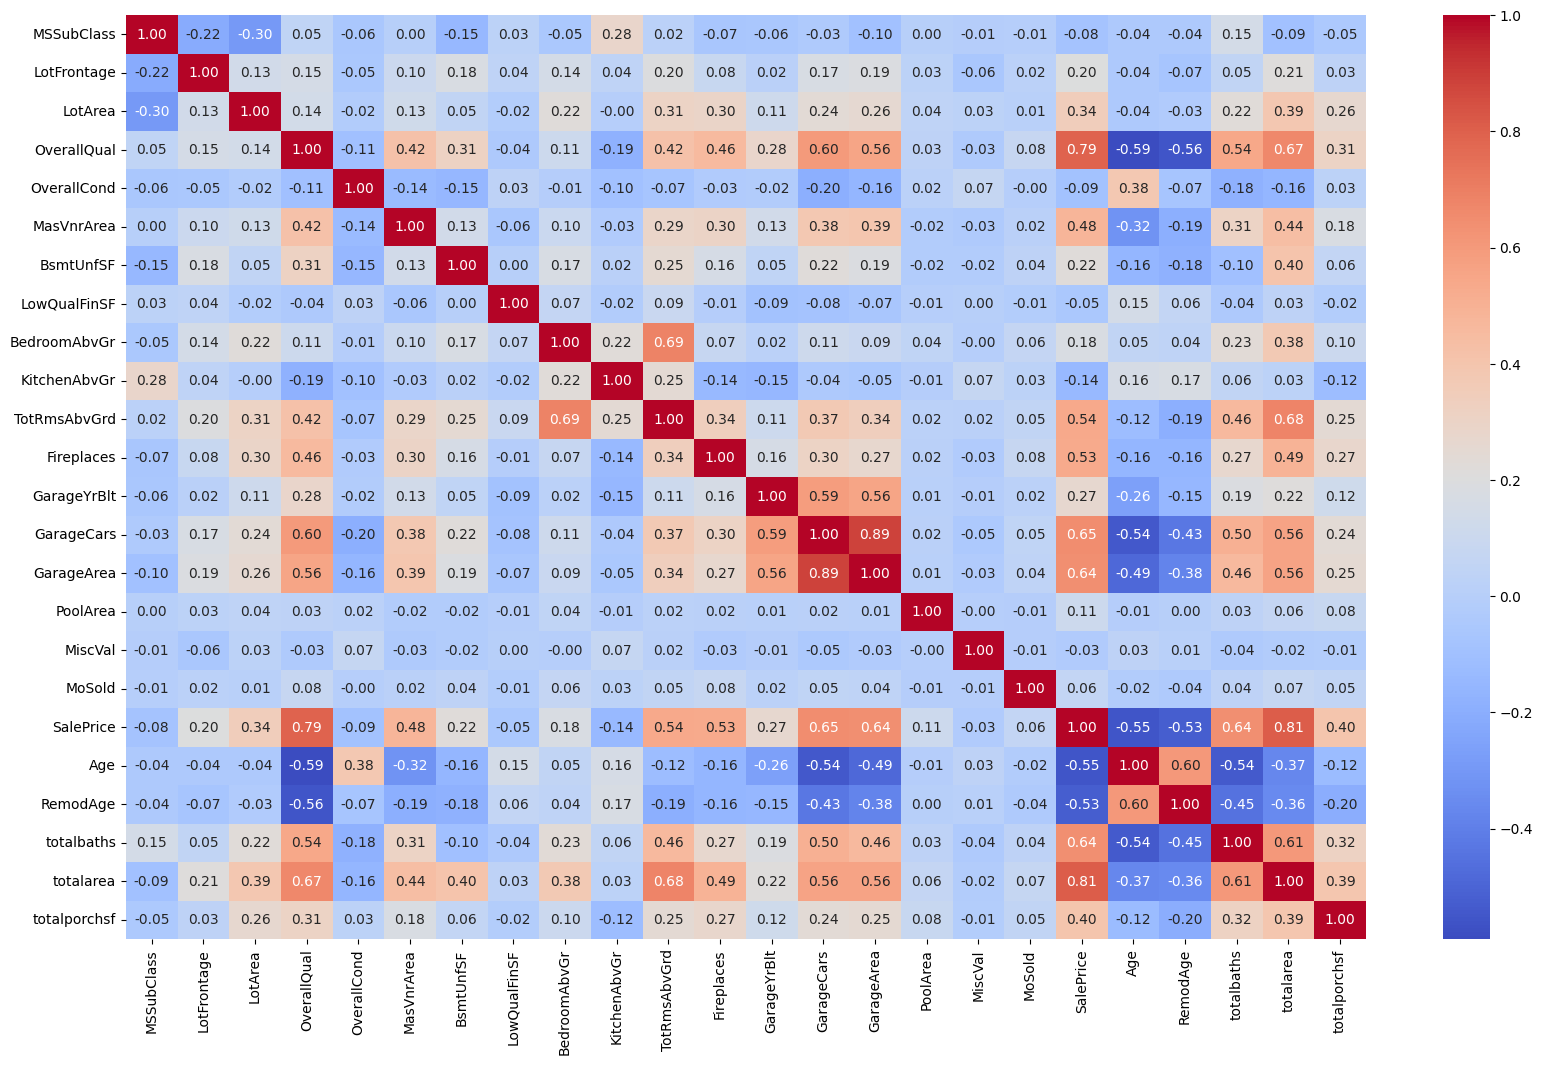

In [91]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [92]:
#drop GarageArea or GarageCars
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

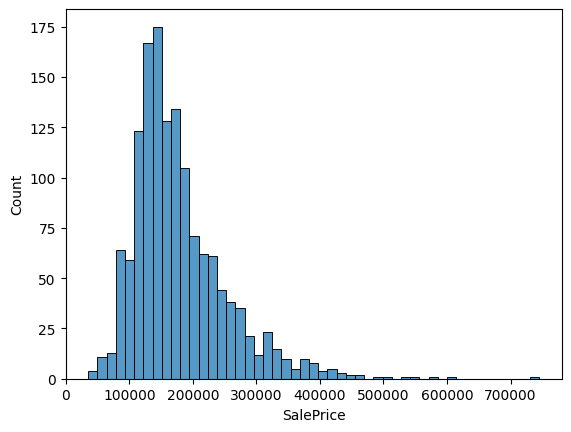

In [ ]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [94]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

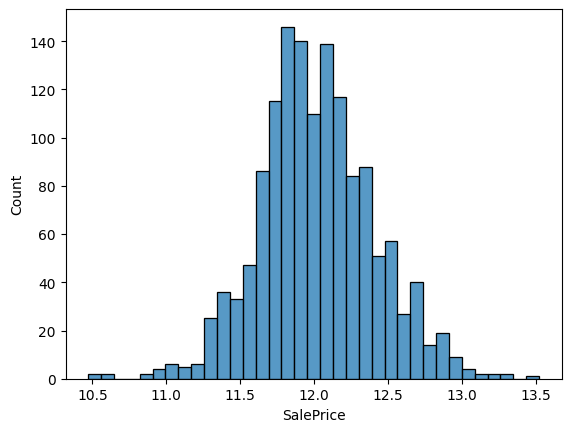

In [95]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [96]:
train_df.dtypes[train_df.dtypes=='object']


MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [170]:
#Using ordinal encoding
#Where order matters
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional',
           'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond', 'BsmtFinType2', 'GarageCond']

In [171]:
#Using One Hot Encoding
#Where order does not matter

ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
            'Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [172]:
# Columns that are already numberic in value
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [173]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scalar', StandardScaler())
])

In [174]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [175]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [176]:
col_trans =  ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols) 
],
remainder='passthrough', #This will allow the pipeline to allow unkown columns to pass thorugh
n_jobs=-1) #will allow for parallel processing

In [177]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [178]:
train_df.head()
#Now the above pipelines will be applied to the dataset
#using pipelines for faster processing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,RemodAge,totalbaths,totalarea,totalporchsf
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,WD,Normal,12.247699,5,5,3.5,2566,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,WD,Normal,12.109016,31,31,2.5,2524,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,WD,Normal,12.317171,7,6,3.5,2706,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,WD,Abnorml,11.849405,91,36,2.0,2473,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,WD,Normal,12.429220,8,8,3.5,3343,276


In [179]:
X = train_df.drop(columns='SalePrice', axis=1)
y = train_df['SalePrice']

In [180]:
X.dtypes[X.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [181]:
X_preprocessed = pipeline.fit_transform(X)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

### Model building

In [184]:
lr = LinearRegression()

In [185]:
lr.fit(X_train, y_train)

LinearRegression()

In [187]:
predict_lr = lr.predict(X_test)

In [188]:
mean_squared_error(y_test, predict_lr)

2.3328865559602495e+19

In [189]:
rfr = RandomForestRegressor(random_state=13)

In [190]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [192]:
rfr_cv = GridSearchCV(rfr, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [193]:
rfr_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [194]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13018820325676894

In [195]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [196]:
GBR = GradientBoostingRegressor()

In [197]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [198]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [202]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [203]:
np.sqrt(-1 * GBR_cv.best_score_)

0.1131367448351633

In [204]:
lgbm_regressor = lgb.LGBMRegressor()

In [205]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [206]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [207]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 109
[LightGBM] [Info] Start training from score 12.023020


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [208]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.12145425711209418

In [209]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [210]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [211]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [212]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002C6527F2AD0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [213]:
np.sqrt(-1 * cat_cv.best_score_)

0.1111433578687702

In [215]:
XGB = XGBRegressor(random_state=13)

In [216]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [217]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [218]:
xgb_cv.fit(X_train, y_train)

C:\Users\saipr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [219]:
np.sqrt(-1 * xgb_cv.best_score_)

0.1143367245735853

In [220]:
ridge = Ridge()

In [221]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [222]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [223]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [224]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10907357298429489

In [225]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [226]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=25,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('ridge', Ridge(alpha=10, solver='lsqr'))],
                weights=[2, 3, 1])

In [227]:
y_pred_vr = vr.predict(X_test)

In [228]:
mean_squared_error(y_test, y_pred_vr, squared=False)

C:\Users\saipr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.14799827617134395

In [229]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [230]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [231]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 1136, number of used features: 109
[LightGBM] [Info] Start training from score 12.023020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1711
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 104
[LightGBM] [Info] Start training from score 12.024791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=12,
                                                         max_features=0.1,
                                                         min_samples_leaf=25,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            importance_type=None,
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=2,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='lsqr'))],
                                                  weights=[2, 3, 1]))

In [232]:
y_pred_stack = stackreg.predict(X_test)

In [236]:
mean_squared_error(y_test, y_pred_stack, squared=False)

C:\Users\saipr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.1454649942957629

In [234]:
df_test_preprocess = pipeline.transform(test_df)

In [235]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

C:\Users\saipr\AppData\Local\Temp\ipykernel_19784\176896153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
